### Beginning of Deep Learning
#### Perceptron XOR Problem


퍼셉트론은 초기에는 단층 구조로 제안되었으며 비선형문제에 한계를 가지고 있었고 XOR 문제는 퍼셉트론이 잘 해결하지 못하는 비선형 분류 문제 중 하나로 알려져 있다.

XOR은 배타적 논리합을 의미하며, 두 개의 입력이 다를 때 1을 출력하고, 같을 때 0을 출력하는 논리 연산을 말한다.


In [ ]:
import numpy as np

In [ ]:
X = np.array([
    [0,0],
    [1,0],
    [0,1],
    [1,1]
])

y = np.array([
    [0],
    [1],
    [1],
    [0]
])

#### MLP 모델 생성

**다층 퍼셉트론(multi-layer perceptron)**이 등장하여 비선형 분류 문제를 해결할 수 있게 됐다.

다층 퍼셉트론은 입력층(input layer), **은닉층(hidden layer)**, 출력층(output layer)으로 구성되며 **은닉층**은 단일 퍼셉트론과 달리 여러 개의 노드로 구성되고 비선형성을 추가하는 역할을 한다.

In [ ]:
import tensorflow as tf

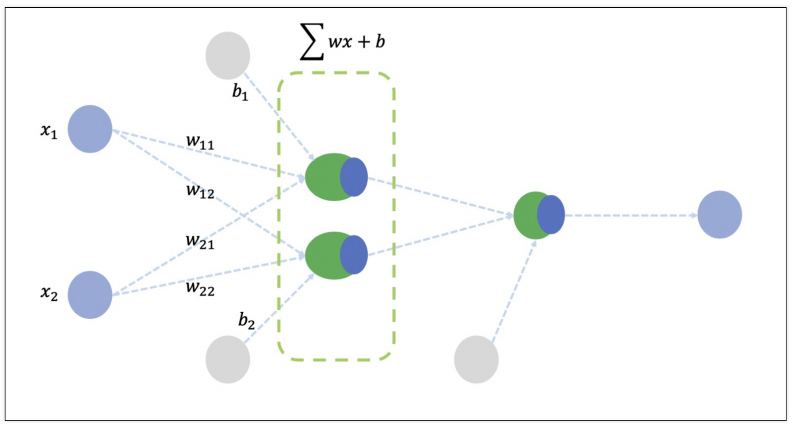


In [ ]:
# 첫 번째 레이어는 입력층과 은닉층 역할
# 두 번째 레이어는 출력층 역할
model = tf.keras.Sequential([
    tf.keras.layers.Dense(2, activation='sigmoid', input_shape=(2,)), # 입력 데이터 2개 , 출력 데이터 2개
    tf.keras.layers.Dense(1, activation='sigmoid') # input_shape=(2,) 생략 ->  앞의 레이어 층의 출력 데이터 형태와 동일
])

In [ ]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1), loss='mse')

In [ ]:
hist = model.fit(X, y, epochs=5000, # epochs : 지정한 횟수만큼 학습
                 batch_size=1) # batch_size : 한번에 학습하는 데이터의 수를 지정

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
4/4 [==============================] - 0s 4ms/step - loss: 0.2325
Epoch 2502/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.2323
Epoch 2503/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.2323
Epoch 2504/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.2323
Epoch 2505/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.2322
Epoch 2506/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.2321
Epoch 2507/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.2321
Epoch 2508/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.2320
Epoch 2509/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.2319
Epoch 2510/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.2318
Epoch 2511/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.2318
Epoch 2512/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.2

In [ ]:
model.predict(X)

1/1 [==============================] - 0s 77ms/step


array([[0.0930924 ],
       [0.9271625 ],
       [0.9132939 ],
       [0.08152722]], dtype=float32)

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline

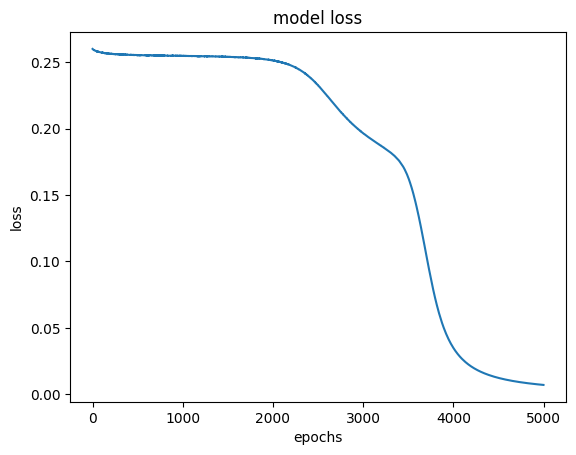

In [ ]:
plt.plot(hist.history['loss']);
plt.title('model loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

#### layer weight

In [ ]:
for w in model.weights:
    print('-----------------------------------------------------')
    print(w)

### Iris Data

In [ ]:
from sklearn.datasets import load_iris

In [ ]:
iris = load_iris()

X = iris.data
y = iris.target

In [ ]:
# Setosa, Versicolor, Virginica 가 0, 1, 2로 표현
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

#### One hot encoding
표현하고 싶은 단어의 인덱스에 1의 값을 부여하고, 다른 인덱스에는 0을 부여하는 벡터 표현 방식이다.
원핫 인코딩을 적용하기 위해서는 각 범주를 고유한 숫자 값으로 대응시켜야 한다.

타겟 변수인 Setosa, Versicolor, Virginica  0, 1, 2 로 고유한 숫자값으로 표현 되어있다.

<img src = 'https://iq.opengenus.org/content/images/2022/01/TW5m0aJ.png'>

###### _Image by <a href = 'https://iq.opengenus.org/one-hot-encoding-in-tensorflow/'>One hot encoding in TensorFlow </a>_

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
enc = OneHotEncoder(sparse= False, # 반환되는 희소 행렬을 밀집 배열로 설정
                    handle_unknown='ignore') # 알려지지 않은 범주를 무시
enc.fit(y.reshape(len(y),1))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


OneHotEncoder(handle_unknown='ignore', sparse=False, sparse_output=False)

In [ ]:
enc.categories_

[array([0, 1, 2])]

In [ ]:
y_onehot = enc.transform(y.reshape(len(y),1))
y_onehot[::20]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [ ]:
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=13)

### 모델 생성

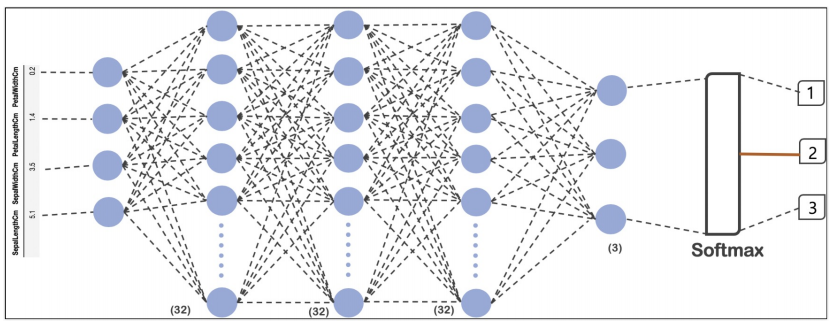

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, input_shape=(4,), activation = 'relu'),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(3,  activation = 'softmax'),
])

In [ ]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 32)                160       
                                                                 
 dense_5 (Dense)             (None, 32)                1056      
                                                                 
 dense_6 (Dense)             (None, 32)                1056      
                                                                 
 dense_7 (Dense)             (None, 3)                 99        
                                                                 
Total params: 2,371
Trainable params: 2,371
Non-trainable params: 0
_________________________________________________________________


In [ ]:
hist = model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
4/4 [==============================] - 6s 10ms/step - loss: 1.3751 - accuracy: 0.3167
Epoch 2/100
4/4 [==============================] - 0s 5ms/step - loss: 1.1405 - accuracy: 0.4750
Epoch 3/100
4/4 [==============================] - 0s 5ms/step - loss: 1.0243 - accuracy: 0.6500
Epoch 4/100
4/4 [==============================] - 0s 5ms/step - loss: 0.9563 - accuracy: 0.7167
Epoch 5/100
4/4 [==============================] - 0s 5ms/step - loss: 0.9261 - accuracy: 0.7000
Epoch 6/100
4/4 [==============================] - 0s 5ms/step - loss: 0.8880 - accuracy: 0.6583
Epoch 7/100
4/4 [==============================] - 0s 8ms/step - loss: 0.8385 - accuracy: 0.9000
Epoch 8/100
4/4 [==============================] - 0s 7ms/step - loss: 0.7822 - accuracy: 0.9583
Epoch 9/100
4/4 [==============================] - 0s 5ms/step - loss: 0.7397 - accuracy: 0.9583
Epoch 10/100
4/4 [==============================] - 0s 5ms/step - loss: 0.7047 - accuracy: 0.9500
Epoch 11/100
4/4 [==========

In [ ]:
model.evaluate(X_test, y_test, verbose=2)

1/1 - 0s - loss: 0.1003 - accuracy: 0.9667 - 305ms/epoch - 305ms/step


[0.10026151686906815, 0.9666666388511658]

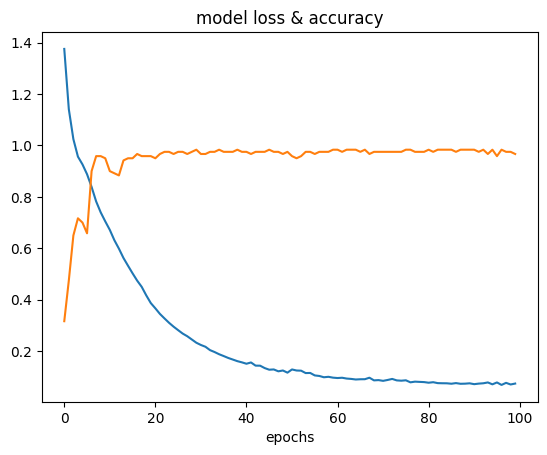

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['accuracy'])
plt.title('model loss & accuracy')
plt.xlabel('epochs')
plt.show()